<a href="https://colab.research.google.com/github/pooja251096/Rossmann-Sales-Prediction-/blob/main/XGBoost__ML_Regression_Rossmann_Store_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#installing shap librar
!pip install shap

     |████████████████████████████████| 371 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509249 sha256=44261903ca35ec8c6bdfd3516e2955a5ebf453b43a7fda6e09a78b5842f65d19
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
# Importing the libraries


import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import datetime



from sklearn import neighbors
from math import sqrt
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score as acc
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import shap
shap.initjs()




We start by importing the necessary libraries.

In [ ]:
##used to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
store_data = pd.read_csv('/content/drive/MyDrive/Almabetter learning/Retail sales prediction/Rossmann Stores Data.csv')
stores = pd.read_csv('/content/drive/MyDrive/Almabetter learning/Retail sales prediction/store.csv')

In [ ]:
# store_data = pd.read_csv('Rossmann Stores Data.csv', low_memory = False)
# stores = pd.read_csv('store.csv')

# **1. Data Analysis**

---



In [ ]:
##View first five rows of the dataframe
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
## Convert the Date column to Datetime
store_data['Date']= pd.to_datetime(store_data['Date'])

## Extract Year and month from Date column
store_data['Year'] = pd.DatetimeIndex(store_data['Date']).year
store_data['Month'] = pd.DatetimeIndex(store_data['Date']).month

Here we extracted the year and month from the Date column, so it can simplify some analysis.

In [ ]:
## Displaying the data
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


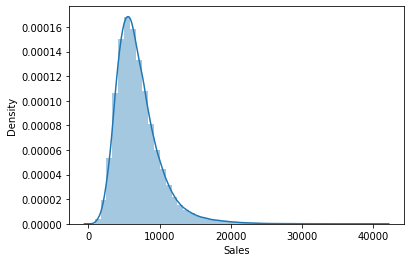

In [ ]:
## Distribution of sales across days
sns.distplot(store_data[store_data['Sales']!=0]['Sales']);

A distribution plot for sales across days to analyze the variability of sales for each stores. It is centered around 8000 sales per day. Here we have excluded the data for days when there were no sales. We can observe the sales to be following almost a normal distribution with some outliers as well on the right. These outliers denote high sales on particular days which can be due to some factors like festival season or days before holiday etc.

In [ ]:
##Create a DataFrame with records having high Sales i.e greater than 20000
store_data_high_sales=store_data[store_data['Sales']>=20000][['Year','Month','Sales']]

#Pivot table to display count of high sales monthwise from the above dataframe
pd.pivot_table(data=store_data_high_sales[['Year','Month','Sales']],index='Month',columns='Year',aggfunc='count',fill_value=0)

Sales          
Year   2013 2014 2015
Month                
1        79   78   75
2        86   96   75
3       169  104  124
4       108  148  151
5       130  123  132
6        88  173  186
7       137   83  123
8        97   76    0
9        74   89    0
10       93   73    0
11      111  120    0
12      532  367    0

From this table we can observe that for both the years the values for December is the highest. This signifies that during December a lot of stores were witnessing extremely high sales per day. Even though the mdeian sales is around 8000 but sales crossed 20000 a large number of times during December So, this cannot be a random occurence. Some seasonality drived the peakness. This is followed by months of March and April we can observe high sales for all the years.

In [ ]:
## Check total sales monthwise
Sales_across_years_monthwise=pd.pivot_table(data=store_data[['Year','Month','Sales']],index=['Month','Year'],aggfunc='sum',fill_value=0).reset_index()
Sales_across_years_monthwise.head()

,Month,Year,Sales
0,1,2013,180132207
1,1,2014,187752787
2,1,2015,198843730
3,2,2013,171534275
4,2,2014,178924677


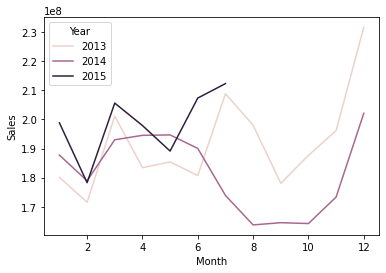

In [ ]:
## Plot of Sales across month for each year
sns.lineplot(data=Sales_across_years_monthwise,x='Month',y='Sales',hue='Year');

This line plot shows the aggregated sales monthwise distributed across three years. We can see the sales is decreasing from January to February and then again increasingly sharply at the end of the year.

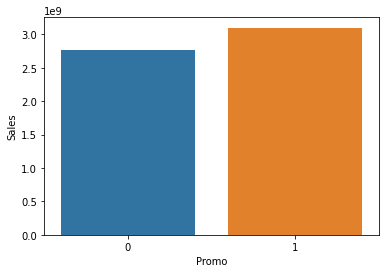

In [ ]:
#store_data['Promo']
sns.barplot(data=pd.pivot_table(data=store_data[['Promo','Sales']],index='Promo',aggfunc='sum',fill_value=0).reset_index(),y='Sales',x='Promo');

Bar plot to show the effect of promo on Sales. It seems that promo had little effect on increasing the sales.

In [ ]:
#EDA Pooja
#store_data.corr()

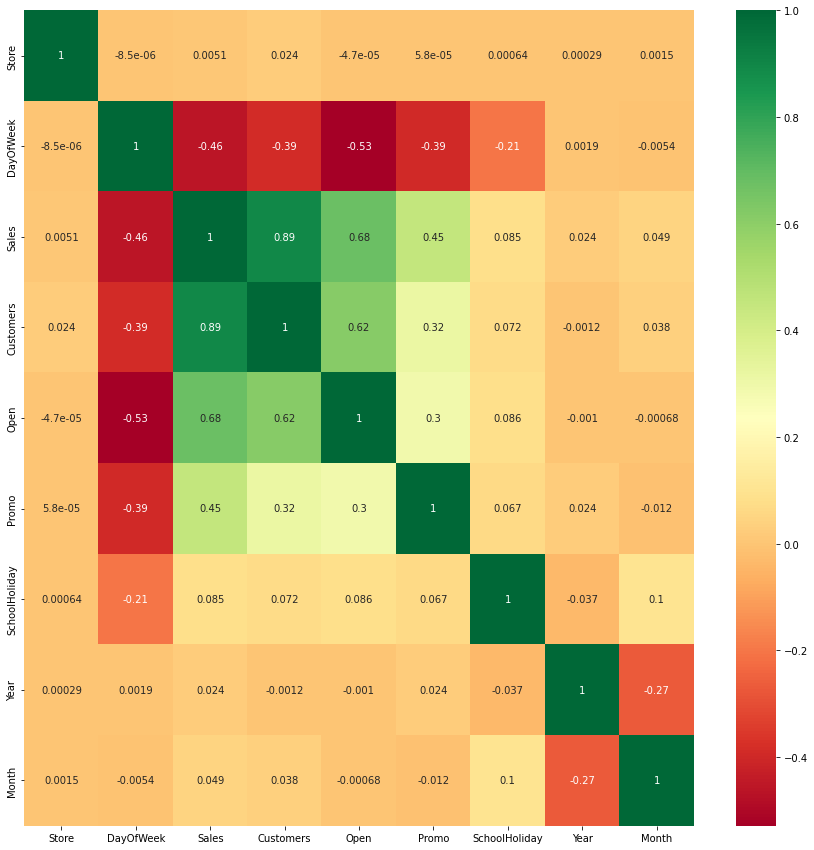

In [ ]:
corrmat = store_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(store_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g=sns.heatmap(store_data[top_corr_features].corr(),cmap="RdYlGn")

From above heat map we can see that there Sales is highly correlated with number of customers. It is obvious that more the number of cutomers visting the store it can possibly lead to high sales. After that we can see Store being open affects the Sales. This should be the case normally since a closed store means no sales at all.

**Sales vs SchoolHoliday**

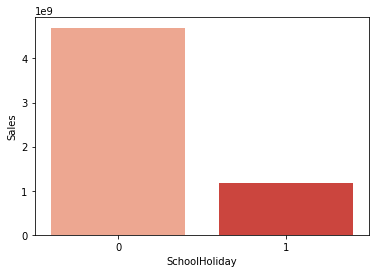

In [ ]:
store_s1=store_data.groupby(['SchoolHoliday'])['Sales'].sum().reset_index()
store_s1
sales_on_schoolholiday = sns.barplot(x='SchoolHoliday', y='Sales', data= store_s1, palette='Reds')
sales_on_schoolholiday;

Sales on School Holiday are fewer than that of days when Schools are open.



**Sales across days**

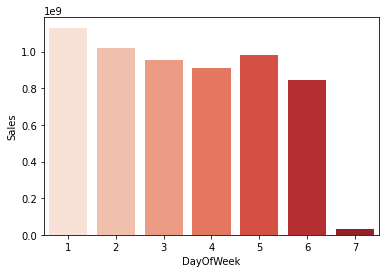

In [ ]:
#Sales across days
store_d1=store_data.groupby(['DayOfWeek'])['Sales'].sum().reset_index()
store_d1
sales_per_day = sns.barplot(x='DayOfWeek', y='Sales', data= store_d1, palette='Reds')


Sales on seventh day of the week (Sunday) is extremely low compared to other dates.



# **Data Cleaning**

In [ ]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
## Null value checks
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We can see that the columns Promo2SinceWeek, Promo2SinceYear and PromoInterval has high number of null values. But we need to dive deeper to understand whether these columns can be dropped or they can be transformed.

In [ ]:
stores[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna())].shape

(544, 10)

In [ ]:
stores[stores['CompetitionOpenSinceMonth'].isna()]['Store'].nunique()

354

This data shows that Stores which did not participate in promo2 have Promo2SinceWeek as null. In similar fashion Promo2SinceYear and PromoInterval are also null. Since promo2 being zero implies store did not participate in promotion, Hence we can impute these null values with zero.

In [ ]:
# Impute null values with zero in records where promo2 is zero
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna()),['Promo2SinceWeek']]=0
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceYear'].isna()),['Promo2SinceYear','PromoInterval']]=0

Here we impute the three columns Promo2SinceWeek, Promo2SinceYear and PromoInterval with zero.

In [ ]:
#Impute CompetitionDistance with max distance
stores.loc[stores['CompetitionDistance'].isna()]=stores['CompetitionDistance'].max()

The null values for column CompetitionDistance is imputed with maximum value. Since, the values are in terms of distance imputing with zero would signify strongest competition.

In [ ]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    351
CompetitionOpenSinceYear     351
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

We check for the null values again, Only the CompetitionOpen feature has null records.

In [ ]:
## Check the CompetitionOpenSinceYear year range
stores['CompetitionOpenSinceYear'].describe()

count      764.000000
mean      2298.660995
std       4621.710349
min       1900.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max      75860.000000
Name: CompetitionOpenSinceYear, dtype: float64

We describe the CompetitionOpenSinceYear to check teh range of values and its distribution. A large portion of data seems to be between 2006 and 2013.

In [ ]:
## This is the day since when we have the sales data
store_data['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
#### calculate difference in number of days for competion and promo
## Function to change data format
def competition_open_yr_mnth(cols):
  try:
    year, month = int(cols[0]), int(cols[1])
    date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
    return date
  except:
    return '1813-01-01'  ## Dummy date to identify this data and do transformation afterwards

stores['CompetitionOpen']=stores[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']].apply(competition_open_yr_mnth,axis=1)
stores['CompetitionOpen']= stores['CompetitionOpen'].dt.strftime('%Y-%m-%d')
stores['CompetitionOpen']= pd.to_datetime(stores['CompetitionOpen'])




def promo_yr_wk(cols):
  try:
    year, week = int(cols[1]), int(cols[0])
    date = pd.to_datetime("{}{}0".format(year, week), format='%Y%W%w')
    return date
  except:
    return '1909-01-01' ## dummy date


stores['promoYearWeek'] =stores[['Promo2SinceWeek', 'Promo2SinceYear']].apply(promo_yr_wk,axis=1)
stores['promoYearWeek'] = stores['promoYearWeek'].dt.strftime('%Y%m%d')
stores['promoYearWeek']= pd.to_datetime(stores['promoYearWeek'])

Using both the columns for Competition open since year and month, we create one new column that has the date since when the competitor store opened. For null values we have added a dummy date. A similiar thing has been done for the promo columns as well. We have combined the year and week column to get the date. A dummy date has been added for null values. With the help of these dummy dates we can later on identify the records which had null value sin the actual dataset and transform them.

In [ ]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2008-09-01,1909-01-01
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01,2010-04-04
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-10
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2009-09-01,1909-01-01
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015-04-01,1909-01-01


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      1115 non-null   int64         
 1   StoreType                  1115 non-null   object        
 2   Assortment                 1115 non-null   object        
 3   CompetitionDistance        1115 non-null   float64       
 4   CompetitionOpenSinceMonth  764 non-null    float64       
 5   CompetitionOpenSinceYear   764 non-null    float64       
 6   Promo2                     1115 non-null   int64         
 7   Promo2SinceWeek            1115 non-null   float64       
 8   Promo2SinceYear            1115 non-null   float64       
 9   PromoInterval              1115 non-null   object        
 10  CompetitionOpen            1115 non-null   datetime64[ns]
 11  promoYearWeek              1115 non-null   datetime64[ns]
dtypes: dat

# **2. Feature Engineering**

In [ ]:
## Join the two datasets
store_data_merged=pd.merge(store_data,stores,on='Store')

Finally we are joining the two dataframe so that corresponding to each sales record we can have other details for that store.

In [ ]:
## Calculate the number of days since when the promo started
store_data_merged['day_diff_comp']=(store_data_merged['Date']-store_data_merged['CompetitionOpen']).dt.days
store_data_merged['day_diff_promo']=(store_data_merged['Date']-store_data_merged['promoYearWeek']).dt.days

## Identifying the data based on the dummy dates and changing them to zero
store_data_merged.loc[store_data_merged['day_diff_comp']>=73000,'day_diff_comp']=0
store_data_merged.loc[store_data_merged['day_diff_promo']>=36500,'day_diff_promo']=0

We create two new features which is the number of days since when the Promo2 is running and the days since when the competitor store opened up. The rows for which dummy dates were placed have been imputed with zero.

In [ ]:
## Sort data in ascending order of date
store_data_merged=store_data_merged.sort_values(['Date']).reset_index()

The data is sorted date wise in ascending order. In this way we can use the data for the last few months for testing our machine learning models.

In [ ]:
store_data_merged.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,promoYearWeek,day_diff_comp,day_diff_promo
0,1014566,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1813-01-01,2012-06-03,0,212
1,458921,504,2,2013-01-01,0,0,0,0,a,1,2013,1,c,c,820.0,NaN,NaN,0,0.0,0.0,0,1813-01-01,1909-01-01,0,0
2,924068,1016,2,2013-01-01,0,0,0,0,a,1,2013,1,c,c,550.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",1813-01-01,2010-09-05,0,849
3,220625,243,2,2013-01-01,0,0,0,0,a,1,2013,1,a,a,310.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",1813-01-01,2013-02-10,0,-40
4,2825,3,2,2013-01-01,0,0,0,0,a,1,2013,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-10,2223,632


In [ ]:
## Get index of data for last year from March to test
#store_data_merged[(store_data_merged['Year']==2015) & (store_data_merged['Month']>=3)].head(2) ## 844431

In [ ]:
# Display columns of merged dataset
store_data_merged.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpen', 'promoYearWeek',
       'day_diff_comp', 'day_diff_promo'],
      dtype='object')

We have a look at all the columns present in the dataset, so we can identify the features that can be used to further train our models.

In [ ]:
store_data_merged.drop(columns=['index','Date','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpen','promoYearWeek'],inplace=True)

We drop the columns not required. Some of them have been merged to form a new feature.

In [ ]:
#store_data.drop(columns='Date',inplace=True)
store_data_merged.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo
0,1115,2,0,0,0,0,a,1,2013,1,d,c,5350.0,1,0,212
1,504,2,0,0,0,0,a,1,2013,1,c,c,820.0,0,0,0
2,1016,2,0,0,0,0,a,1,2013,1,c,c,550.0,1,0,849
3,243,2,0,0,0,0,a,1,2013,1,a,a,310.0,1,0,-40
4,3,2,0,0,0,0,a,1,2013,1,a,a,14130.0,1,2223,632


In [ ]:
store_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014567 entries, 0 to 1014566
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1014567 non-null  int64  
 1   DayOfWeek            1014567 non-null  int64  
 2   Sales                1014567 non-null  int64  
 3   Customers            1014567 non-null  int64  
 4   Open                 1014567 non-null  int64  
 5   Promo                1014567 non-null  int64  
 6   StateHoliday         1014567 non-null  object 
 7   SchoolHoliday        1014567 non-null  int64  
 8   Year                 1014567 non-null  int64  
 9   Month                1014567 non-null  int64  
 10  StoreType            1014567 non-null  object 
 11  Assortment           1014567 non-null  object 
 12  CompetitionDistance  1014567 non-null  float64
 13  Promo2               1014567 non-null  int64  
 14  day_diff_comp        1014567 non-null  int64  
 15

We can see that some of the features have object data type. We can keep them as object to transform them into categories later on.

In [ ]:
## Convert datatype of CompetitionDistance from 
store_data_merged['CompetitionDistance']=store_data_merged['CompetitionDistance'].astype(int)

The feature CompetitionDistance is in float datatype, so converting to an integer type.

In [ ]:
## Encoding Assortment with numerical values
store_data_merged['Assortment']=store_data_merged['Assortment'].apply(lambda x: 1 if x=='a' else (2 if x=='b' else 3))

The feature Assortment has three categories. We are encoding with numbers from 1 to 3.

In [ ]:
## Converting Day of Week to object type
store_data_merged['DayOfWeek']=store_data_merged['DayOfWeek'].astype(object)

Since the Day of Week is in number, a regression model will fit coefficients based on number. So instead of that it can be converted to object type so as to get categories out of it. Our model can then predict based on the categories.

In [ ]:
## Create Dummy variables for object type data
##store_data_final=pd.get_dummies(store_data_merged,drop_first=True)
dataset_1 = pd.get_dummies(store_data_merged,drop_first=True)
store_data_final=pd.get_dummies(store_data_merged,drop_first=True)

For rest of the object features they are converted to categories. Here we get the final dataset with all the feature transformations. This data can be put into the machine learning models by modulating as per requirement of model.

In [ ]:
## Check presence of null in data
store_data_final.isna().sum().sum()


0

In [ ]:
store_data_final.isna().sum()

Store                  0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
Year                   0
Month                  0
Assortment             0
CompetitionDistance    0
Promo2                 0
day_diff_comp          0
day_diff_promo         0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
StateHoliday_0         0
StateHoliday_a         0
StateHoliday_b         0
StateHoliday_c         0
StoreType_b            0
StoreType_c            0
StoreType_d            0
dtype: int64


After completing all the feature engineering. Finally, we cross check the presence of null values again in our dataset. This is the final dataset from where we would divide our data into train and test sets.

In [ ]:
#dataset_1 = pd.get_dummies(store_data_merged,drop_first=True)
#store_data_final=pd.get_dummies(store_data_merged,drop_first=True)

In [ ]:
## Divide data into train and test
## Index based split to test sales for last few months instead of selecting randomly from dataset
store_data_train=store_data_final.iloc[0:844431]
store_data_test=store_data_final.iloc[844431:]

The data had been sorted according to the sales date in ascending order. So the last record represents the latest sales data. Hence, the data has been split into train and test dataset in a way so that we can use the data from last few months to test the accuracy of our model.

In [ ]:
## Separating the target variable from both train and test dataset and converting the dataframe into numpy array.
X_train=store_data_train.drop(['Sales','Store'],axis=1).to_numpy()
y_train=store_data_train['Sales'].to_numpy()

X_test=store_data_test.drop(['Sales','Store'],axis=1).to_numpy()
y_test=store_data_test['Sales'].to_numpy()

In this step the target variable is separated from the independent features. Then it is further converted from DataFrame to numpy array as the regression algorithms accept arrays.

In [ ]:
## Standardisation of data so that it can be used for regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
## Using the paarmeters from Standard scaler to transform test dataset
X_test = scaler.transform(X_test)

The training data is Standardised by invoking the StandardScaler libraray from sklearn and then the fit's parameters is used to transform the test dataset.

## Splitting Dependent variables and Target variables

In [ ]:
X = dataset_1.drop(columns=['Sales'])
y = dataset_target=dataset_1['Sales']

## Splitting the dataset into the Training set and Test set

In [ ]:
# Split dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=False )

Twenty percent of the data is being used for testing the accuracy of models. Since the data is already sorted, for the test dataset the last twenty percent is picked.

## Feature Scaling

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

The train dataset is transformed using the Standard Scaler method and the same parameters are used to fit the test dataset.

# **5. XGB Regressor Model**

---



## Training XGB Regressor model on the Training set and Predicting the Test set results

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# Define the XGB regressor
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
# Fit the model
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(verbosity=0)

We fit the model on our training data.

## Evaluating the Model Performance 

In [ ]:
# Cross validation using XGB regressor
cv_score = cross_val_score(xgbr, X_train_scaled, y_train, cv=10)
print("cv mean score: ", cv_score.mean())

cv mean score:  0.9355266593737641


The mean score obtained using cross validation is 0.93.

In [ ]:
# Predict the test data
y_pred = xgbr.predict(X_test_scaled)
MSE = mean_squared_error(y_test, y_pred)
print("MSE: ",MSE)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

MSE:  1112570.581123796
Mean squared error: 1112570.58


We predict the test data set using the XGB regressor and obtain a Mean Square error of 1112570.581123796.

In [ ]:
from sklearn.metrics import r2_score
r2_xgb=r2_score(y_test, y_pred)
print("R-square value using XGB: {:.3f}".format(r2_xgb))

R-square value using XGB: 0.926


The R-square value obtained on the test dataset is 0.92

In [ ]:
# Store R-square and Adjusted R-square in a list
r2_adj_xgb=1-(1-r2_xgb)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
xgb_scores=list([r2_xgb,r2_adj_xgb])

In [ ]:
xgbr.feature_importances_

array([0.01306403, 0.56248903, 0.        , 0.10754602, 0.        ,
       0.        , 0.03293385, 0.02895013, 0.02243589, 0.01111822,
       0.0055802 , 0.01654072, 0.00435069, 0.00502403, 0.01173258,
       0.01616976, 0.00743678, 0.00612352, 0.        , 0.        ,
       0.        , 0.        , 0.0517191 , 0.00476528, 0.0920202 ],
      dtype=float32)

In [ ]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)

In [ ]:
# Using shap to exlain the model
X_shap=X_train
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_shap)

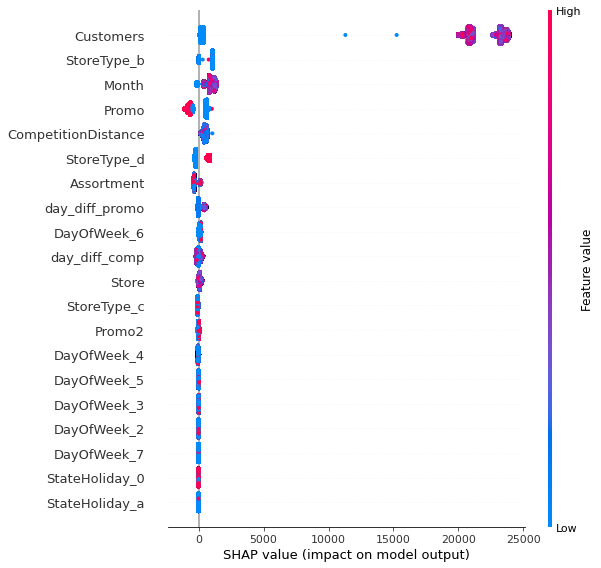

In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type="dot")

In [ ]:
#shap.summary_plot(shap_values, X_shap)

<BarContainer object of 25 artists>

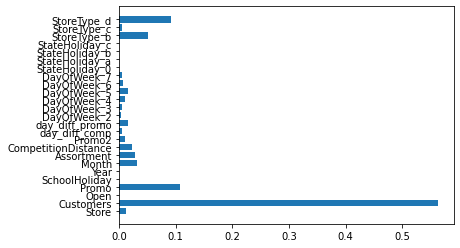

In [ ]:
plt.barh(X_train.columns,xgbr.feature_importances_)

<BarContainer object of 25 artists>

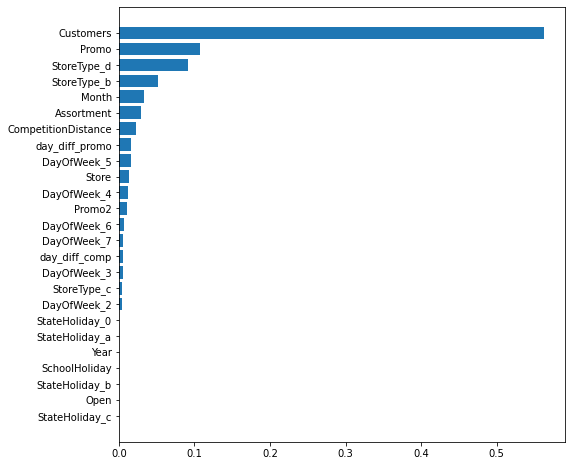

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sorted_idx = xgbr.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],xgbr.feature_importances_[sorted_idx])


# ***7. Conclusion***

---



In [ ]:
# 
pd.DataFrame({'XGB Regr':xgb_scores},index=['R2 Score','Adj R2 Score'])

,XGB Regr
R2 Score,0.925541
Adj R2 Score,0.925532
